#### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Steps involved are:
1. Data Understanding
2. Data Analysis and Cleaning
3. Data Preparation
4. Model Building and Evaluation
5. Question-Answer

# Step 1: Data Understanding

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [165]:
df.shape

(1460, 81)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Step 2: Data Analysis and Cleaning

## Analysing numerical columns 

In [167]:
numeric_vars = df.select_dtypes(['float64','int64'])
numeric_vars.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### Numerical data frame (numeric_vars) has few categorical columns, which are:
- MSSubClass
- OverallQual
- OverallCond

### Analysing these categorical variables

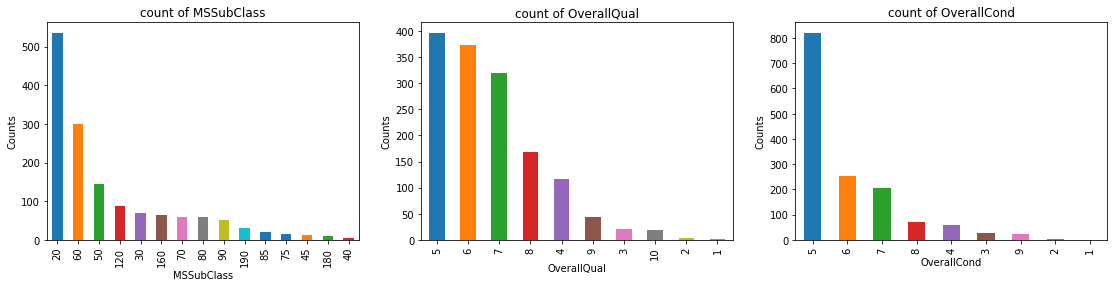

In [168]:
plt.figure(figsize = (19,4))
plt.subplot(1,3,1)
df['MSSubClass'].value_counts().plot('bar')
plt.xlabel('MSSubClass')
plt.ylabel('Counts')
plt.title('count of MSSubClass')
plt.subplot(1,3,2)
df['OverallQual'].value_counts().plot('bar')
plt.xlabel('OverallQual')
plt.ylabel('Counts')
plt.title('count of OverallQual')
plt.subplot(1,3,3)
df['OverallCond'].value_counts().plot('bar')
plt.xlabel('OverallCond')
plt.ylabel('Counts')
plt.title('count of OverallCond')
plt.show()

##### inferences:
1. counts of 20, 60 and 50 MSSubClass are more where
  - 20 = 1-STORY 1946 & NEWER ALL STYLES
  - 60 = 2-STORY 1946 & NEWER
  - 50 = 1-1/2 STORY FINISHED ALL AGES
2. mostly the houses have the overall quality between 5-7 where 
  - 5 = Average
  - 6 = Above Average
  - 7 = Good
3. maximum houses have the overall condition 5
  - 5 = Average

### Analysing Sale Price of the houses on the basis of the year it is built

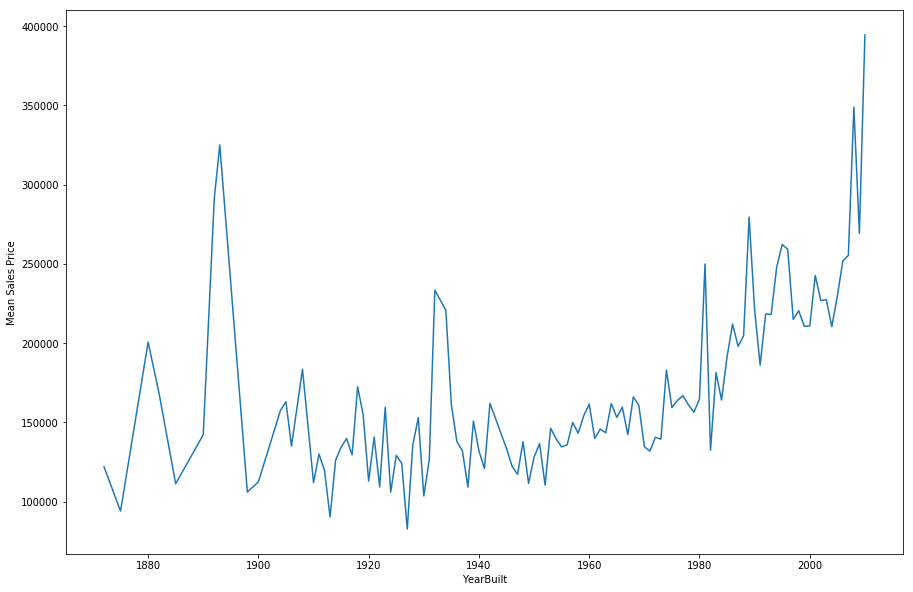

In [169]:
# mean sales price year-wise 
plt.figure(figsize = (15,10))
numeric_vars.groupby(['YearBuilt'])['SalePrice'].mean().plot('line')
plt.ylabel('Mean Sales Price')
plt.show()

##### inferences:
- new houses have higher prices 

### creating column "Age_of_property_in_Years" and dropping YearBuilt, YrSold and MoSold columns  

In [170]:
numeric_vars['Age_of_property_in_Years'] = numeric_vars['YrSold'] - numeric_vars['YearBuilt']
numeric_vars = numeric_vars.drop(['YearBuilt','YrSold','MoSold'],1)
numeric_vars.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_of_property_in_Years
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,208500,5
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,181500,31
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,223500,7
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,140000,91
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,250000,8


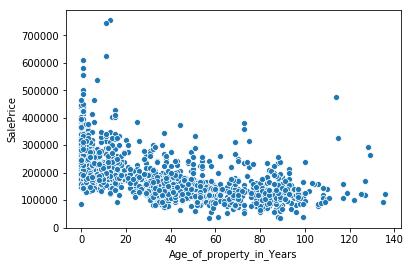

In [171]:
# plot between SalePrice and Age_of_property_in_Years
sns.scatterplot(x = 'Age_of_property_in_Years', y = 'SalePrice', data = numeric_vars)
plt.show()

##### inferences:
- as the age of the property increases, the price decreases

### Finding the percentage of null values in numeric_vars data frame 

In [172]:
round(100*(numeric_vars.isnull().sum()/len(numeric_vars.index)),2)

Id                           0.00
MSSubClass                   0.00
LotFrontage                 17.74
LotArea                      0.00
OverallQual                  0.00
OverallCond                  0.00
YearRemodAdd                 0.00
MasVnrArea                   0.55
BsmtFinSF1                   0.00
BsmtFinSF2                   0.00
BsmtUnfSF                    0.00
TotalBsmtSF                  0.00
1stFlrSF                     0.00
2ndFlrSF                     0.00
LowQualFinSF                 0.00
GrLivArea                    0.00
BsmtFullBath                 0.00
BsmtHalfBath                 0.00
FullBath                     0.00
HalfBath                     0.00
BedroomAbvGr                 0.00
KitchenAbvGr                 0.00
TotRmsAbvGrd                 0.00
Fireplaces                   0.00
GarageYrBlt                  5.55
GarageCars                   0.00
GarageArea                   0.00
WoodDeckSF                   0.00
OpenPorchSF                  0.00
EnclosedPorch 

### Imputing the missing values with their mean 

In [173]:
numeric_vars['LotFrontage'] = numeric_vars['LotFrontage'].fillna(numeric_vars['LotFrontage'].mean())
numeric_vars['MasVnrArea'] = numeric_vars['MasVnrArea'].fillna(numeric_vars['MasVnrArea'].mean())

### deleting unnecessary/redundant columns ('OverallCond','GarageYrBlt','YearRemodAdd')

In [174]:
numeric_vars = numeric_vars.drop(['OverallCond','GarageYrBlt','YearRemodAdd'], axis = 1)
numeric_vars.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_of_property_in_Years
0,1,60,65.0,8450,7,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,208500,5
1,2,20,80.0,9600,6,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,181500,31
2,3,60,68.0,11250,7,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,223500,7
3,4,70,60.0,9550,7,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,140000,91
4,5,60,84.0,14260,8,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,250000,8


#### analysing basement area

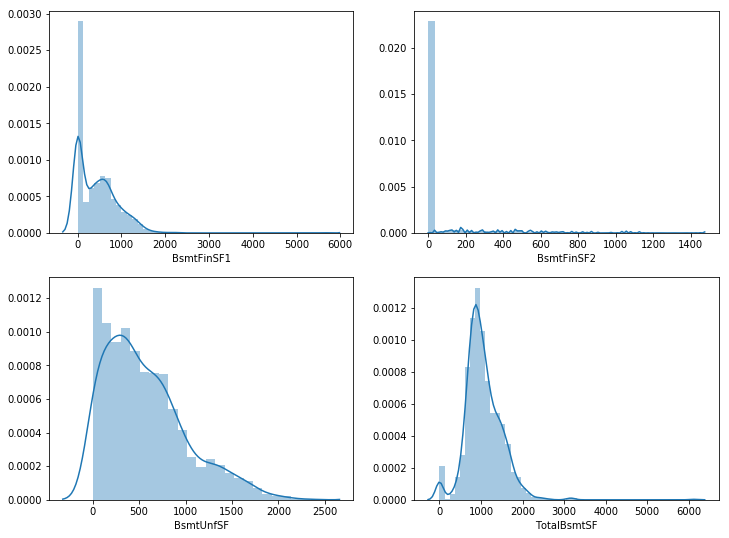

In [175]:
plt.figure(figsize = (12,9))
plt.subplot(2,2,1)
sns.distplot(numeric_vars['BsmtFinSF1'])
plt.subplot(2,2,2)
sns.distplot(numeric_vars['BsmtFinSF2'])
plt.subplot(2,2,3)
sns.distplot(numeric_vars['BsmtUnfSF'])
plt.subplot(2,2,4)
sns.distplot(numeric_vars['TotalBsmtSF'])
plt.show()

### Since "BsmtFinSF2" shows no variance therefore dropping this column

In [176]:
numeric_vars = numeric_vars.drop(['BsmtFinSF2'], axis = 1)

#### analysing how basement area is affecting the sale price of the houses

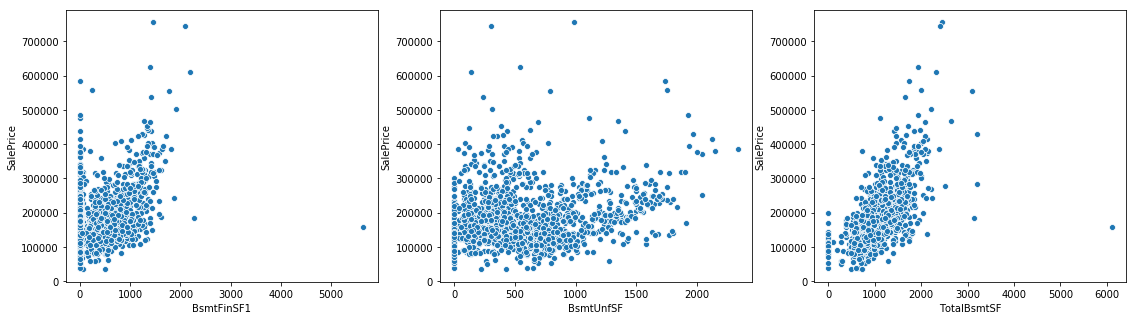

In [177]:
plt.figure(figsize = (19,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'BsmtFinSF1', y = 'SalePrice', data = numeric_vars)
plt.subplot(1,3,2)
sns.scatterplot(x = 'BsmtUnfSF', y = 'SalePrice', data = numeric_vars)
plt.subplot(1,3,3)
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = numeric_vars)
plt.show()

##### inferences:
- Basement area does not really affecting the sale price of the houses
- As mostly the basement area of the houses are between 0 to 2000 range  

### Analysing the columns having following meanings:
- 1stFlrSF: First Floor square feet 
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet

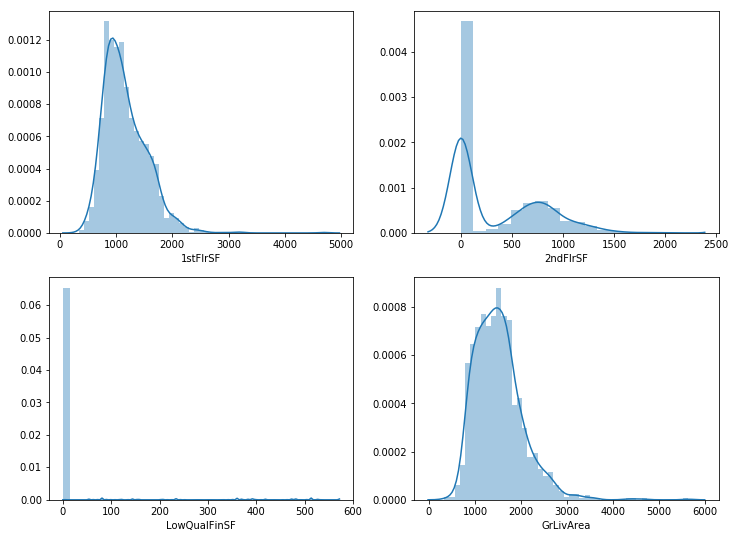

In [178]:
plt.figure(figsize = (12,9))
plt.subplot(2,2,1)
sns.distplot(numeric_vars['1stFlrSF'])
plt.subplot(2,2,2)
sns.distplot(numeric_vars['2ndFlrSF'])
plt.subplot(2,2,3)
sns.distplot(numeric_vars['LowQualFinSF'])
plt.subplot(2,2,4)
sns.distplot(numeric_vars['GrLivArea'])
plt.show()

### Dropping the column "LowQualFinSF" as it has no value to the data set

In [179]:
numeric_vars = numeric_vars.drop(['LowQualFinSF'], axis = 1)

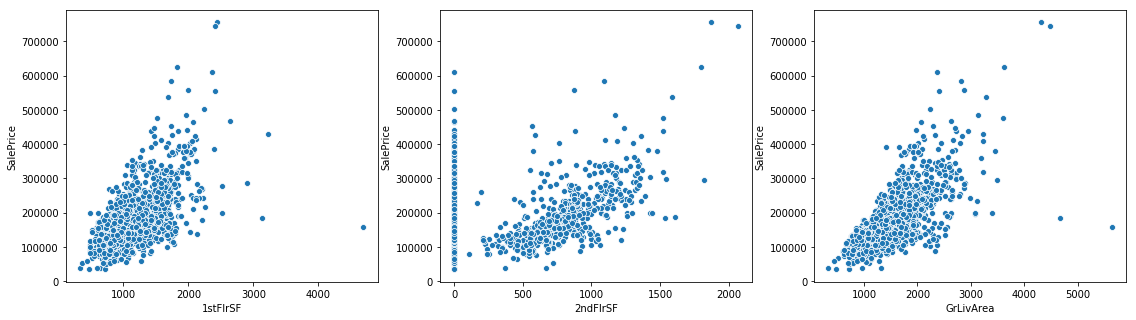

In [180]:
plt.figure(figsize = (19,5))
plt.subplot(1,3,1)
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = numeric_vars)
plt.subplot(1,3,2)
sns.scatterplot(x = '2ndFlrSF', y = 'SalePrice', data = numeric_vars)
plt.subplot(1,3,3)
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = numeric_vars)
plt.show()

##### inferences:
- Sale price and the above three variables are linearly related

### Analysing the columns with the sale price having following meanings:
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade

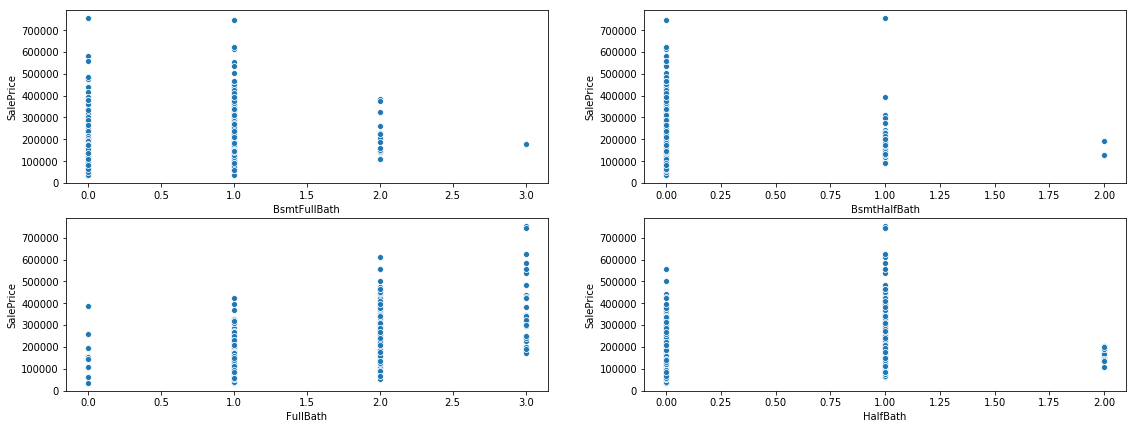

In [181]:
plt.figure(figsize = (19,7))
plt.subplot(2,2,1)
sns.scatterplot(x = 'BsmtFullBath', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,2)
sns.scatterplot(x = 'BsmtHalfBath', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,3)
sns.scatterplot(x = 'FullBath', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,4)
sns.scatterplot(x = 'HalfBath', y = 'SalePrice', data = numeric_vars)
plt.show()

### Dropping columns "BsmtFullBath" and "BsmtHalfBath" as it is adding less value to the data set

In [182]:
numeric_vars = numeric_vars.drop(['BsmtFullBath','BsmtHalfBath'], axis = 1)

### Analysing the columns with the sale price having following meanings:
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet

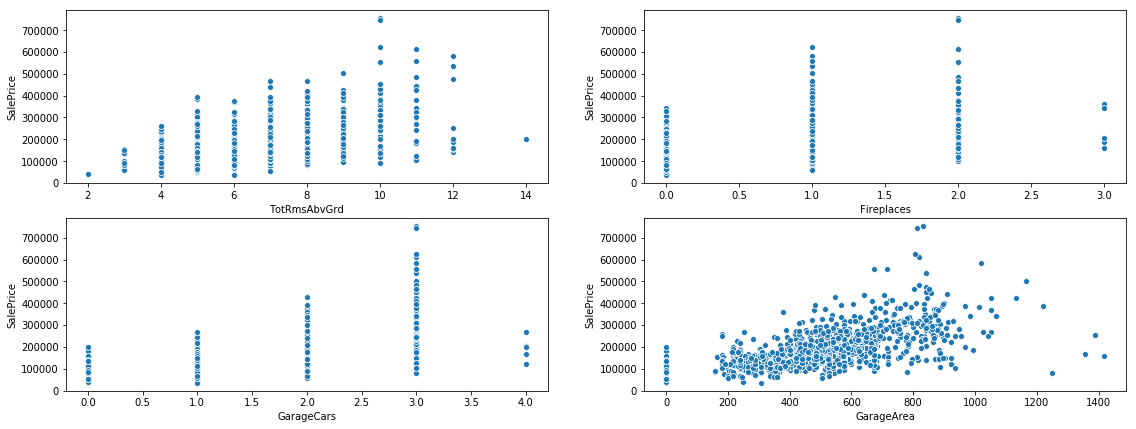

In [183]:
plt.figure(figsize = (19,7))
plt.subplot(2,2,1)
sns.scatterplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,2)
sns.scatterplot(x = 'Fireplaces', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,3)
sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data = numeric_vars)
plt.subplot(2,2,4)
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = numeric_vars)
plt.show()

### Dropping "Fireplaces" and "GarageCars"

In [184]:
numeric_vars = numeric_vars.drop(['Fireplaces','GarageCars'], axis = 1)

### Analysing columns which has following meanings:
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet

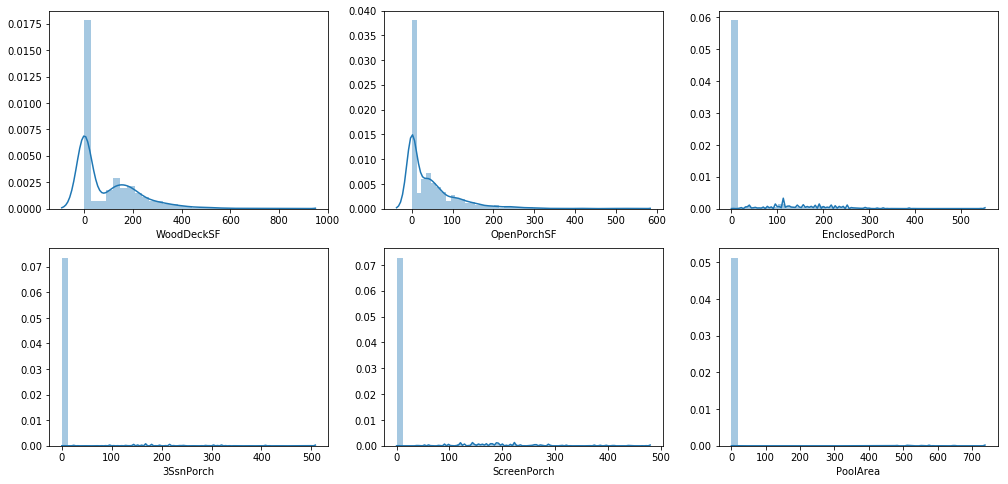

In [185]:
plt.figure(figsize = (17,8))
plt.subplot(2,3,1)
sns.distplot(numeric_vars['WoodDeckSF'])
plt.subplot(2,3,2)
sns.distplot(numeric_vars['OpenPorchSF'])
plt.subplot(2,3,3)
sns.distplot(numeric_vars['EnclosedPorch'])
plt.subplot(2,3,4)
sns.distplot(numeric_vars['3SsnPorch'])
plt.subplot(2,3,5)
sns.distplot(numeric_vars['ScreenPorch'])
plt.subplot(2,3,6)
sns.distplot(numeric_vars['PoolArea'])
plt.show()

### Dropping (EnclosedPorch, 3SsnPorch, ScreenPorch and PoolArea) because of their low variance

In [186]:
numeric_vars = numeric_vars.drop(['EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1)

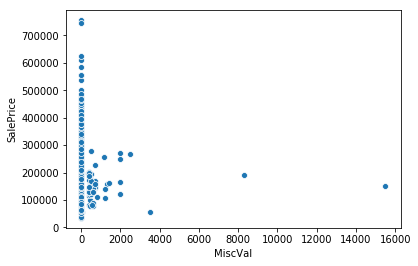

In [187]:
sns.scatterplot(x = 'MiscVal', y = 'SalePrice', data = numeric_vars)

### Dropping "MiscVal", "Id" and few redundant variables like "BedroomAbvGr" and "KitchenAbvGr"

In [188]:
numeric_vars = numeric_vars.drop(['MiscVal','Id','BedroomAbvGr','KitchenAbvGr'], axis = 1)

In [189]:
numeric_vars.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age_of_property_in_Years
1455,60,62.0,7917,6,0.0,0,953,953,953,694,1647,2,1,7,460,0,40,175000,8
1456,20,85.0,13175,6,119.0,790,589,1542,2073,0,2073,2,0,7,500,349,0,210000,32
1457,70,66.0,9042,7,0.0,275,877,1152,1188,1152,2340,2,0,9,252,0,60,266500,69
1458,20,68.0,9717,5,0.0,49,0,1078,1078,0,1078,1,0,5,240,366,0,142125,60
1459,20,75.0,9937,5,0.0,830,136,1256,1256,0,1256,1,1,6,276,736,68,147500,43


### Checking correlations

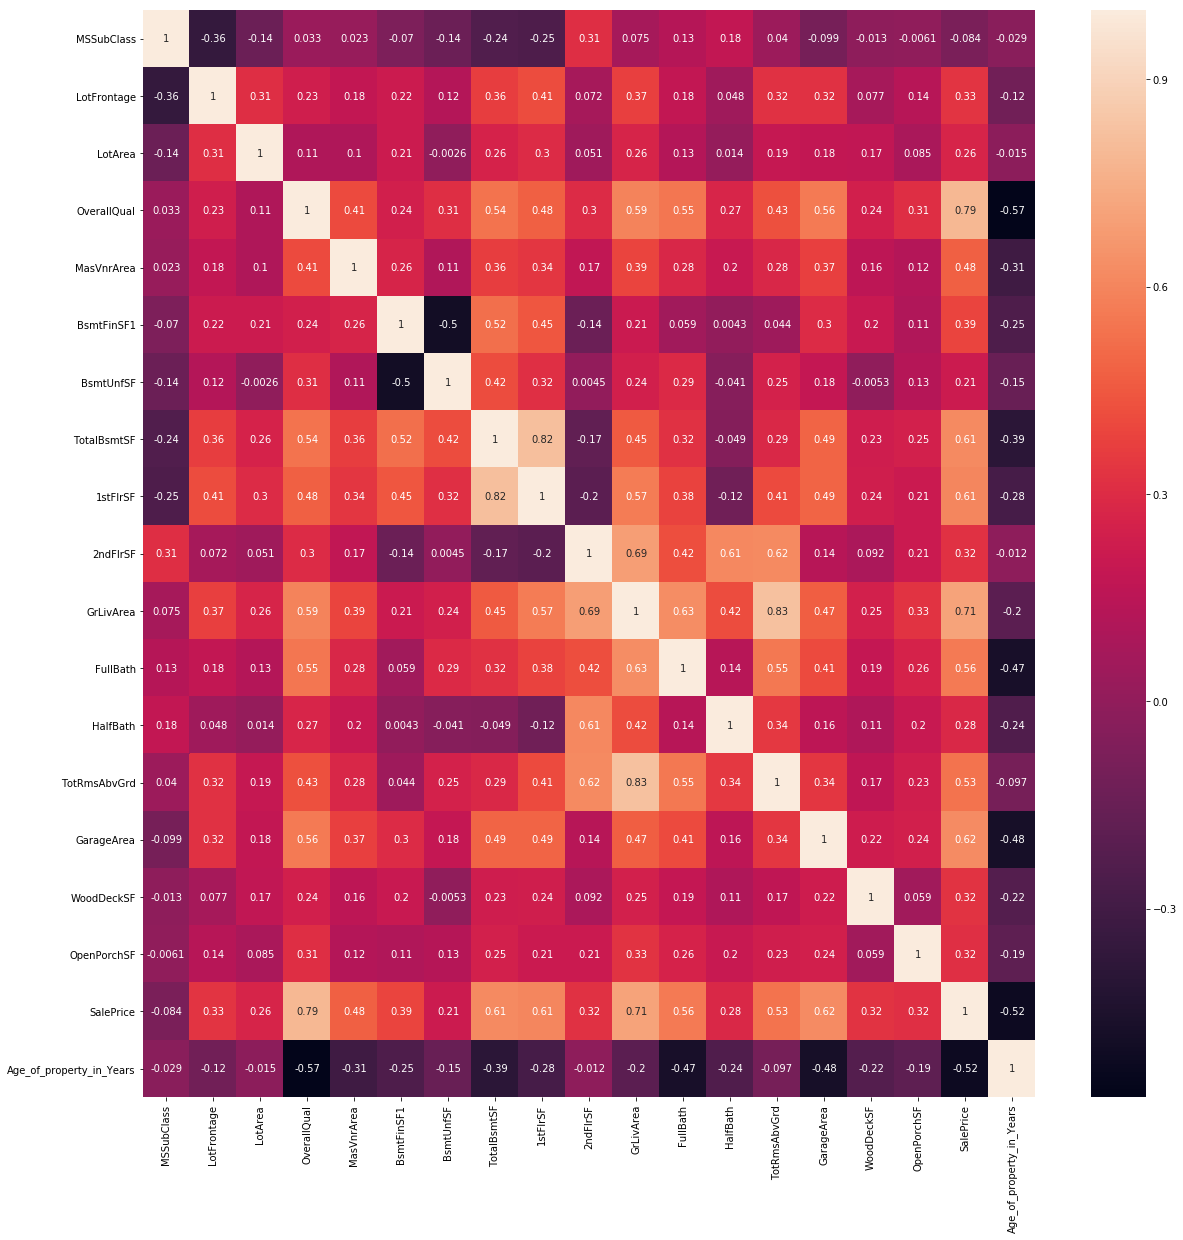

In [190]:
plt.figure(figsize=(20,20))
sns.heatmap(numeric_vars.corr(), annot = True)
plt.show()

##### inferences:
- There seem to be no variables which are highly correlated

### Checking outliers

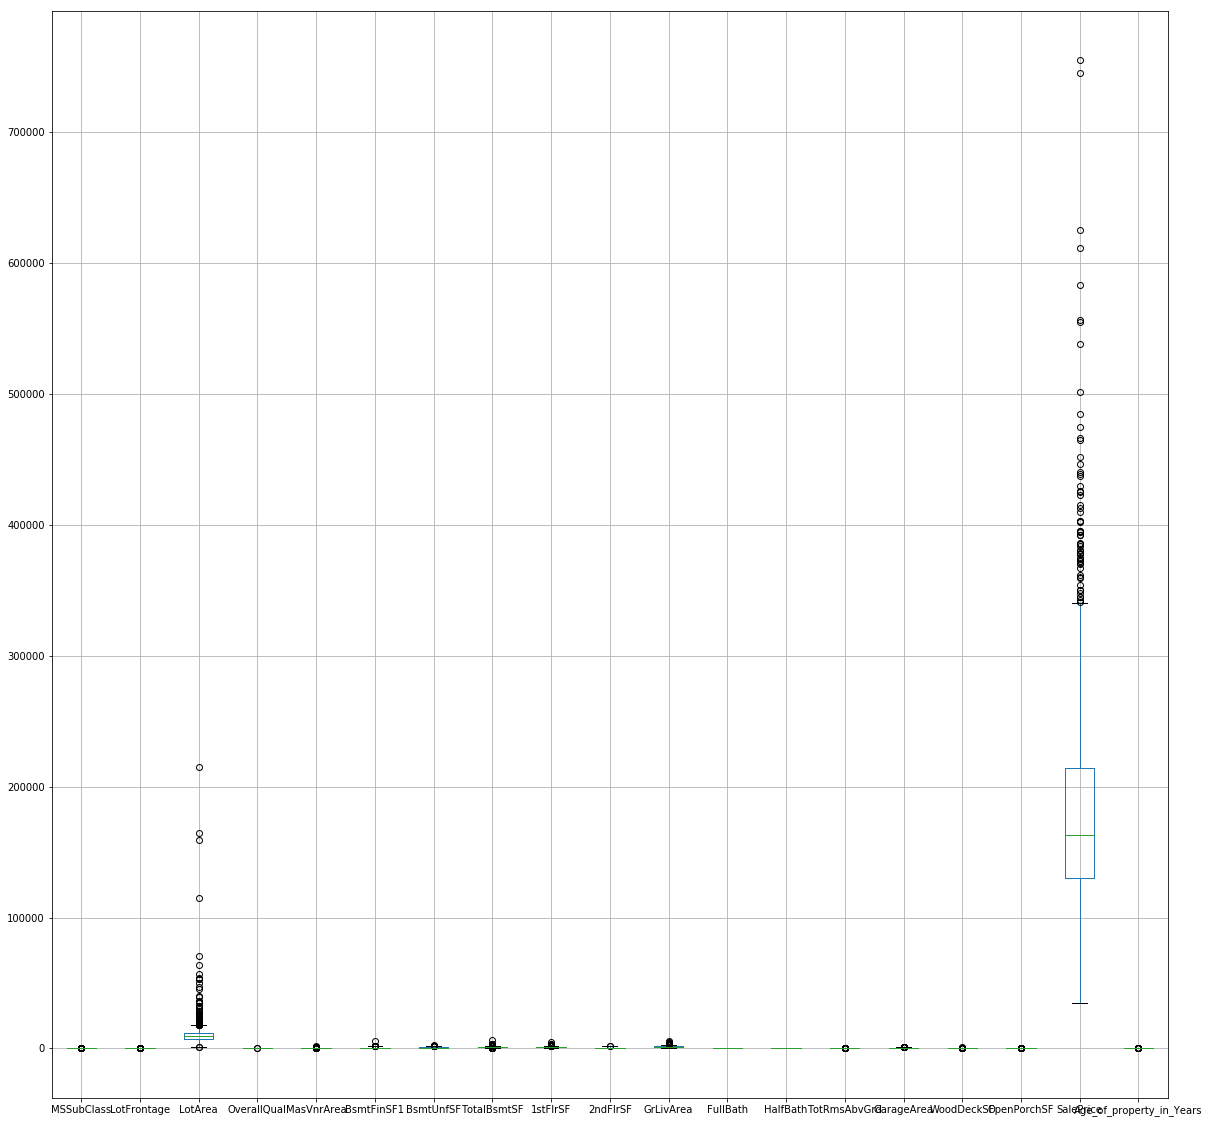

In [191]:
temp_vars = numeric_vars.select_dtypes(include = ['float64','int64'])
plt.figure(figsize = (20,20))
temp_vars.boxplot()
plt.show()

#### inferences:
- LotArea has few outliers which will not affect our analysis therefore we can keep it and move ahead with that

## Analysing non-numerical columns 

In [192]:
non_numeric_vars = df.select_dtypes(exclude = ['float64','int64'])
non_numeric_vars.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [193]:
round(100*(non_numeric_vars.isnull().sum()/len(non_numeric_vars.index)),2)

MSZoning          0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
KitchenQual       0.00
Functional        0.00
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
SaleType          0.00
SaleCondition     0.00
dtype: floa

### Deleting columns having more than 45% missing data

In [194]:
non_numeric_vars = non_numeric_vars.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

### Imputing NaN values with their mode 

In [195]:
temp_vars = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType',
             'GarageFinish','GarageQual','GarageCond']

for var in temp_vars:
    non_numeric_vars[var] = non_numeric_vars[var].fillna(non_numeric_vars[var].mode()[0])    

In [196]:
non_numeric_vars.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

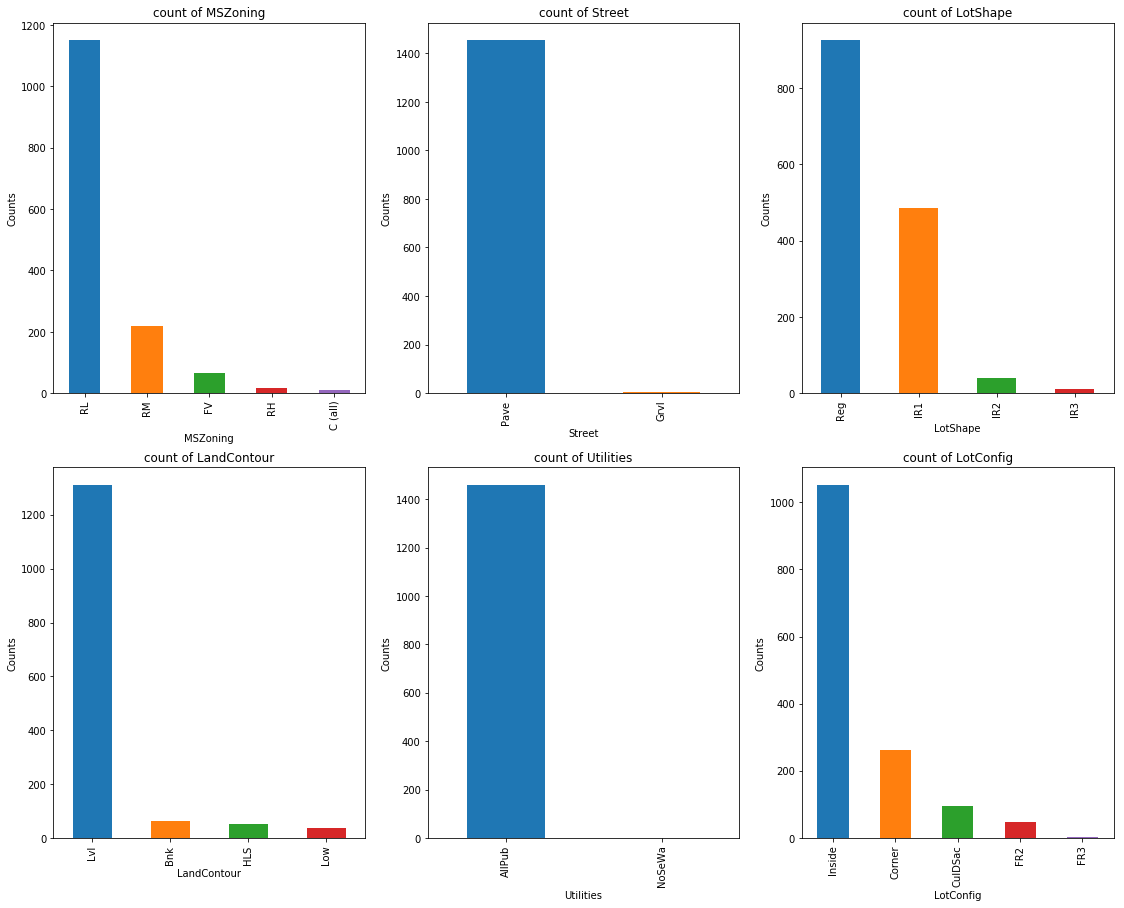

In [197]:
plt.figure(figsize = (19,15))
plt.subplot(2,3,1)
non_numeric_vars['MSZoning'].value_counts().plot('bar')
plt.xlabel('MSZoning')
plt.ylabel('Counts')
plt.title('count of MSZoning')
plt.subplot(2,3,2)
non_numeric_vars['Street'].value_counts().plot('bar')
plt.xlabel('Street')
plt.ylabel('Counts')
plt.title('count of Street')
plt.subplot(2,3,3)
non_numeric_vars['LotShape'].value_counts().plot('bar')
plt.xlabel('LotShape')
plt.ylabel('Counts')
plt.title('count of LotShape')
plt.subplot(2,3,4)
non_numeric_vars['LandContour'].value_counts().plot('bar')
plt.xlabel('LandContour')
plt.ylabel('Counts')
plt.title('count of LandContour')
plt.subplot(2,3,5)
non_numeric_vars['Utilities'].value_counts().plot('bar')
plt.xlabel('Utilities')
plt.ylabel('Counts')
plt.title('count of Utilities')
plt.subplot(2,3,6)
non_numeric_vars['LotConfig'].value_counts().plot('bar')
plt.xlabel('LotConfig')
plt.ylabel('Counts')
plt.title('count of LotConfig')
plt.show()

##### inferences:
- MSzoning is mostly Residential Low Density(RL)
- Streets are generally Paved
- LotShape are Regular
- LandContour are nearly Flat or Leveled
- All Public Utilities are present
- Mostly it is Inside LotConfig

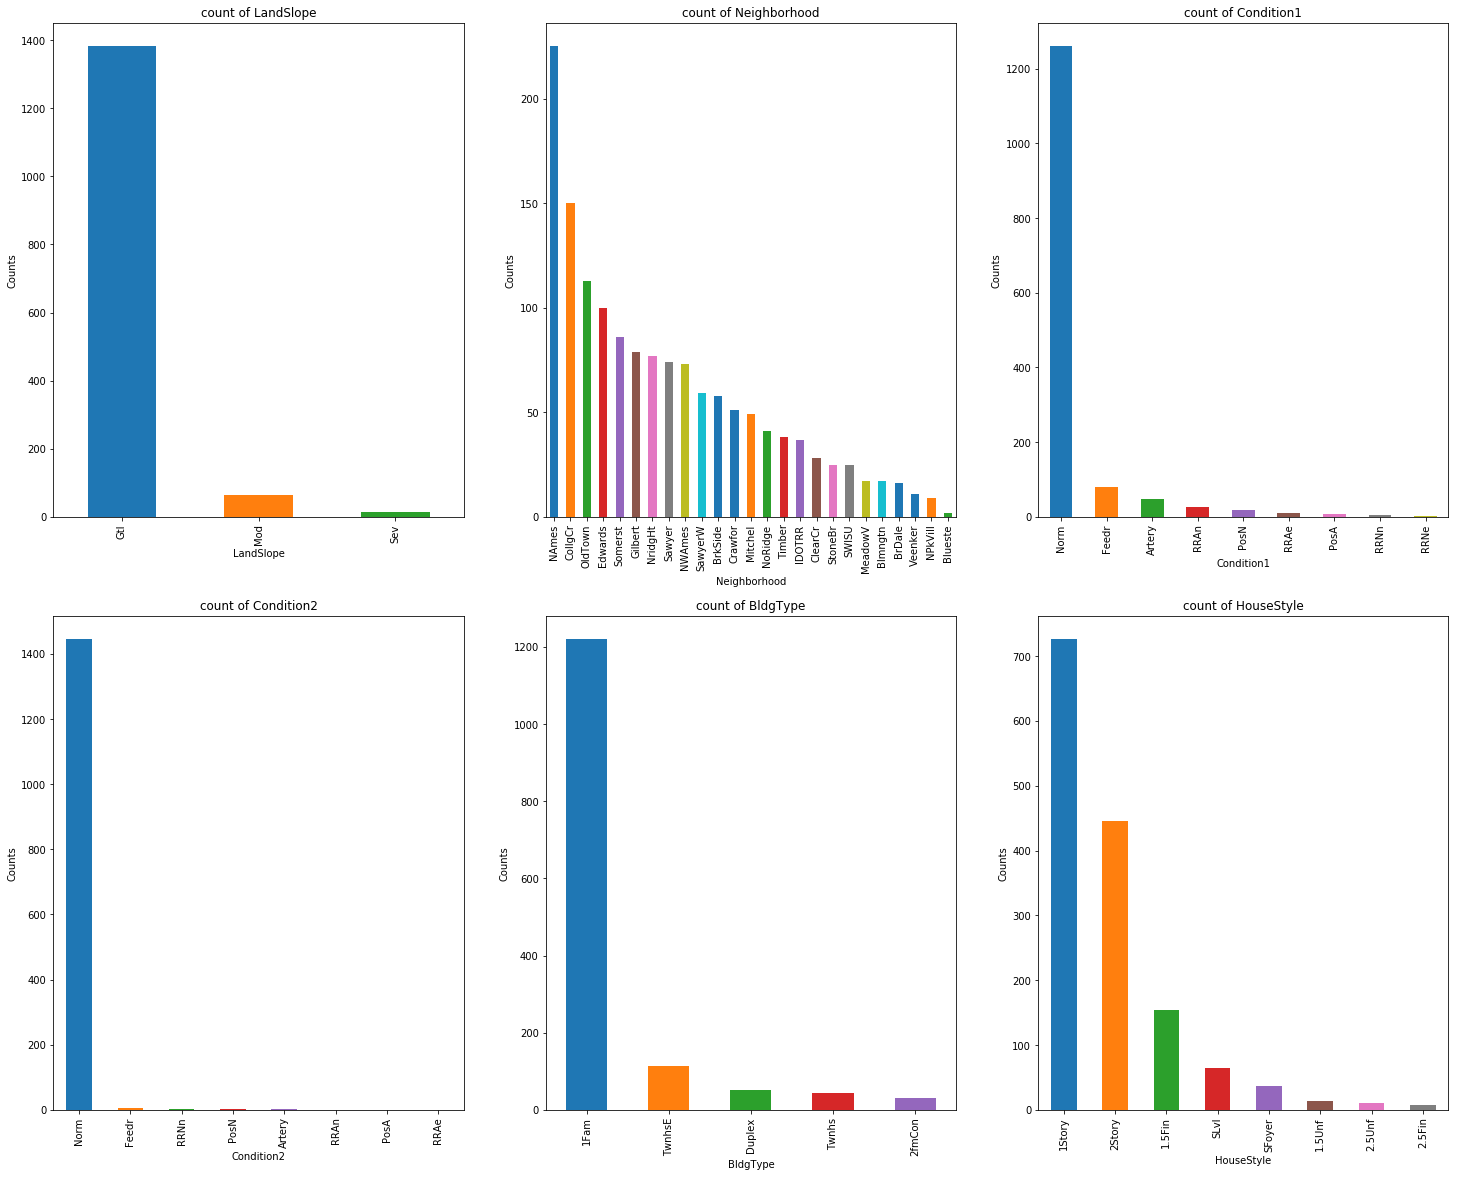

In [198]:
temp_vars = ['LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle']
plt.figure(figsize = (25,20))
for i in range(len(temp_vars)):
    plt.subplot(2,3,i+1)
    non_numeric_vars[temp_vars[i]].value_counts().plot('bar')
    plt.xlabel(temp_vars[i])
    plt.ylabel('Counts')
    plt.title('count of ' + temp_vars[i])
plt.show()    

##### inferences:
- Slopes are gentle 
- Neighborhood are North Ames, College Creek and Old Town
- Conditions are generally normal
- Building type are mostly Single-family Detached	
- House Styles are generally 1 story and 2 story

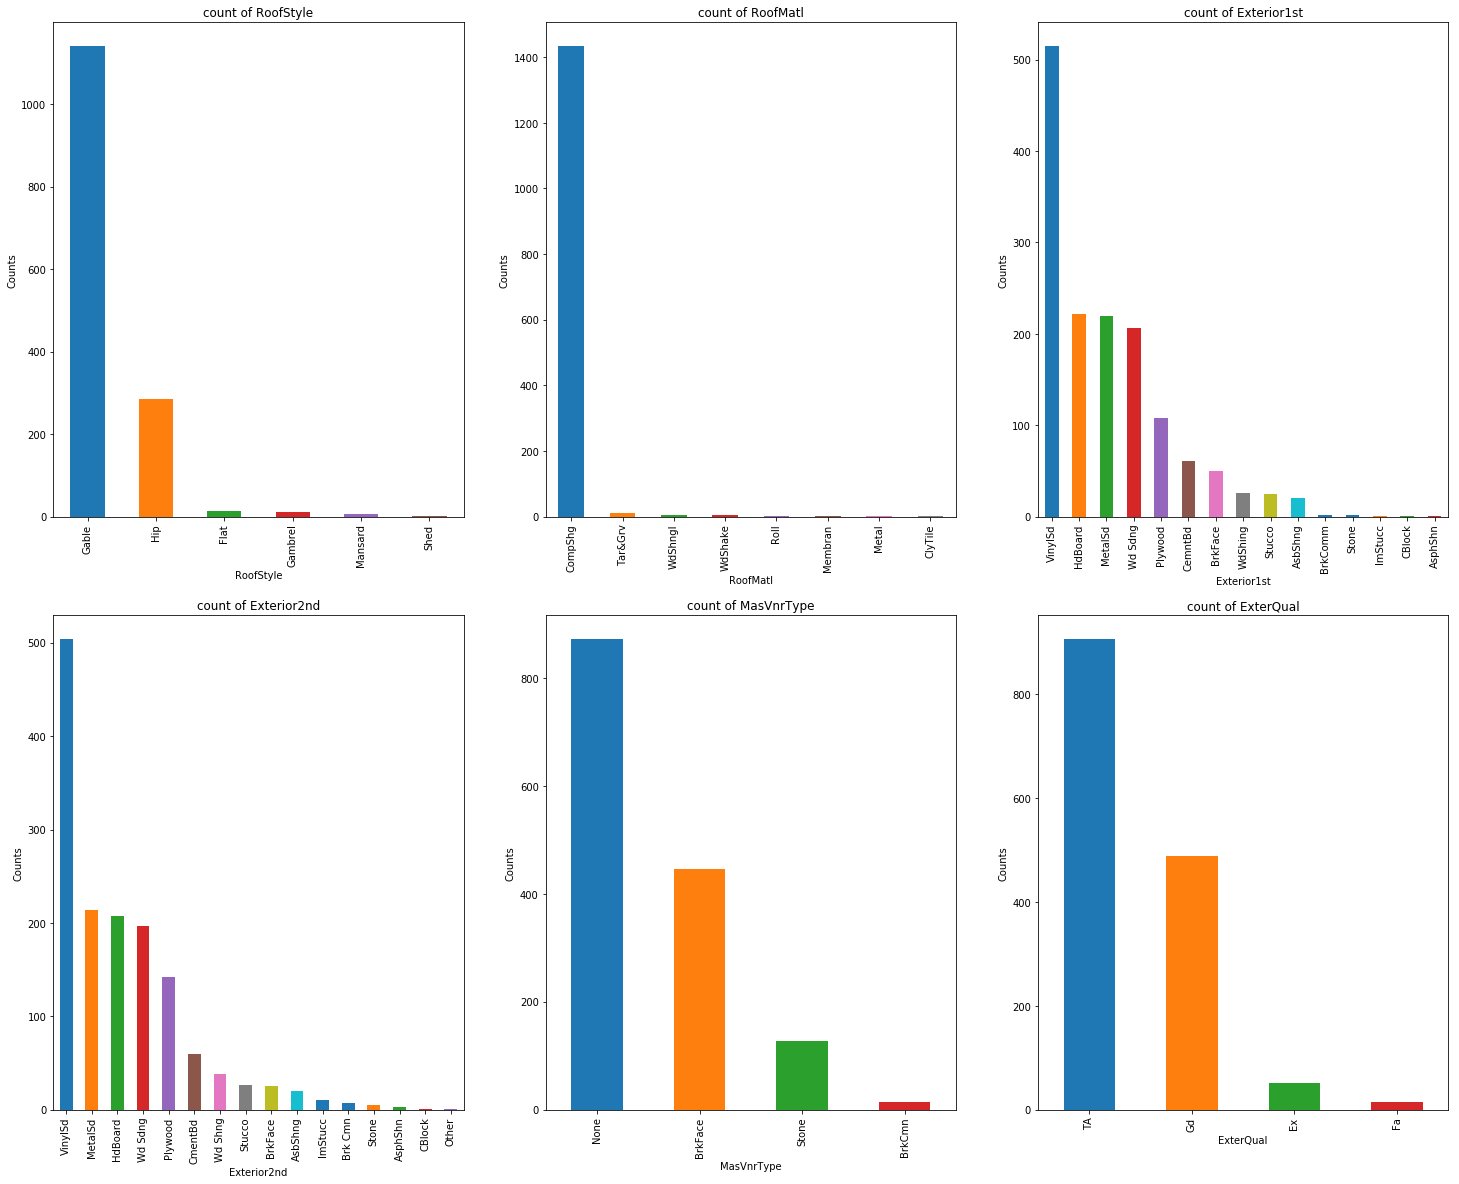

In [199]:
temp_vars = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual']
plt.figure(figsize = (25,20))
for i in range(len(temp_vars)):
    plt.subplot(2,3,i+1)
    non_numeric_vars[temp_vars[i]].value_counts().plot('bar')
    plt.xlabel(temp_vars[i])
    plt.ylabel('Counts')
    plt.title('count of ' + temp_vars[i])
plt.show()    

##### inferences:
- Most of the Roof Style are Gable 
- Exterior covering are mostly Vinyl Siding
- Exterior quality is average

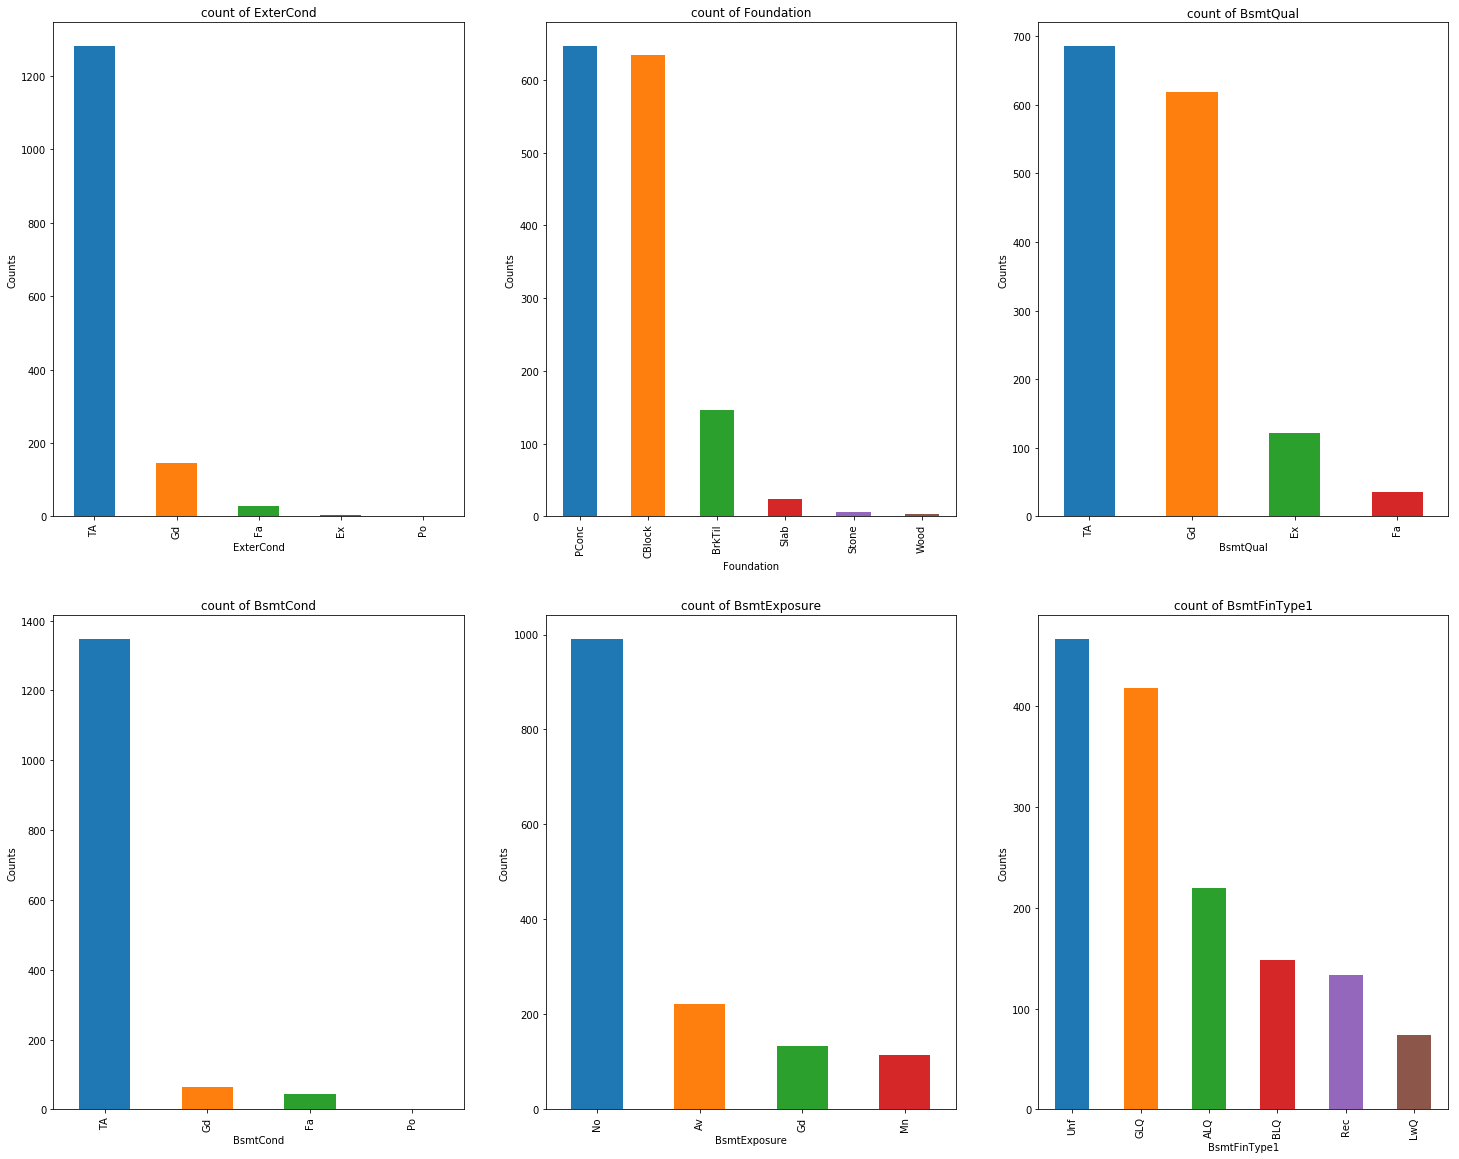

In [200]:
temp_vars = ['ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']
plt.figure(figsize = (25,20))
for i in range(len(temp_vars)):
    plt.subplot(2,3,i+1)
    non_numeric_vars[temp_vars[i]].value_counts().plot('bar')
    plt.xlabel(temp_vars[i])
    plt.ylabel('Counts')
    plt.title('count of ' + temp_vars[i])
plt.show()  

##### inferences:
- Exterior condition is average
- Type of Foundation are Poured Contrete and Cinder Block
- Basement condition are average
- There is no any basement exposure

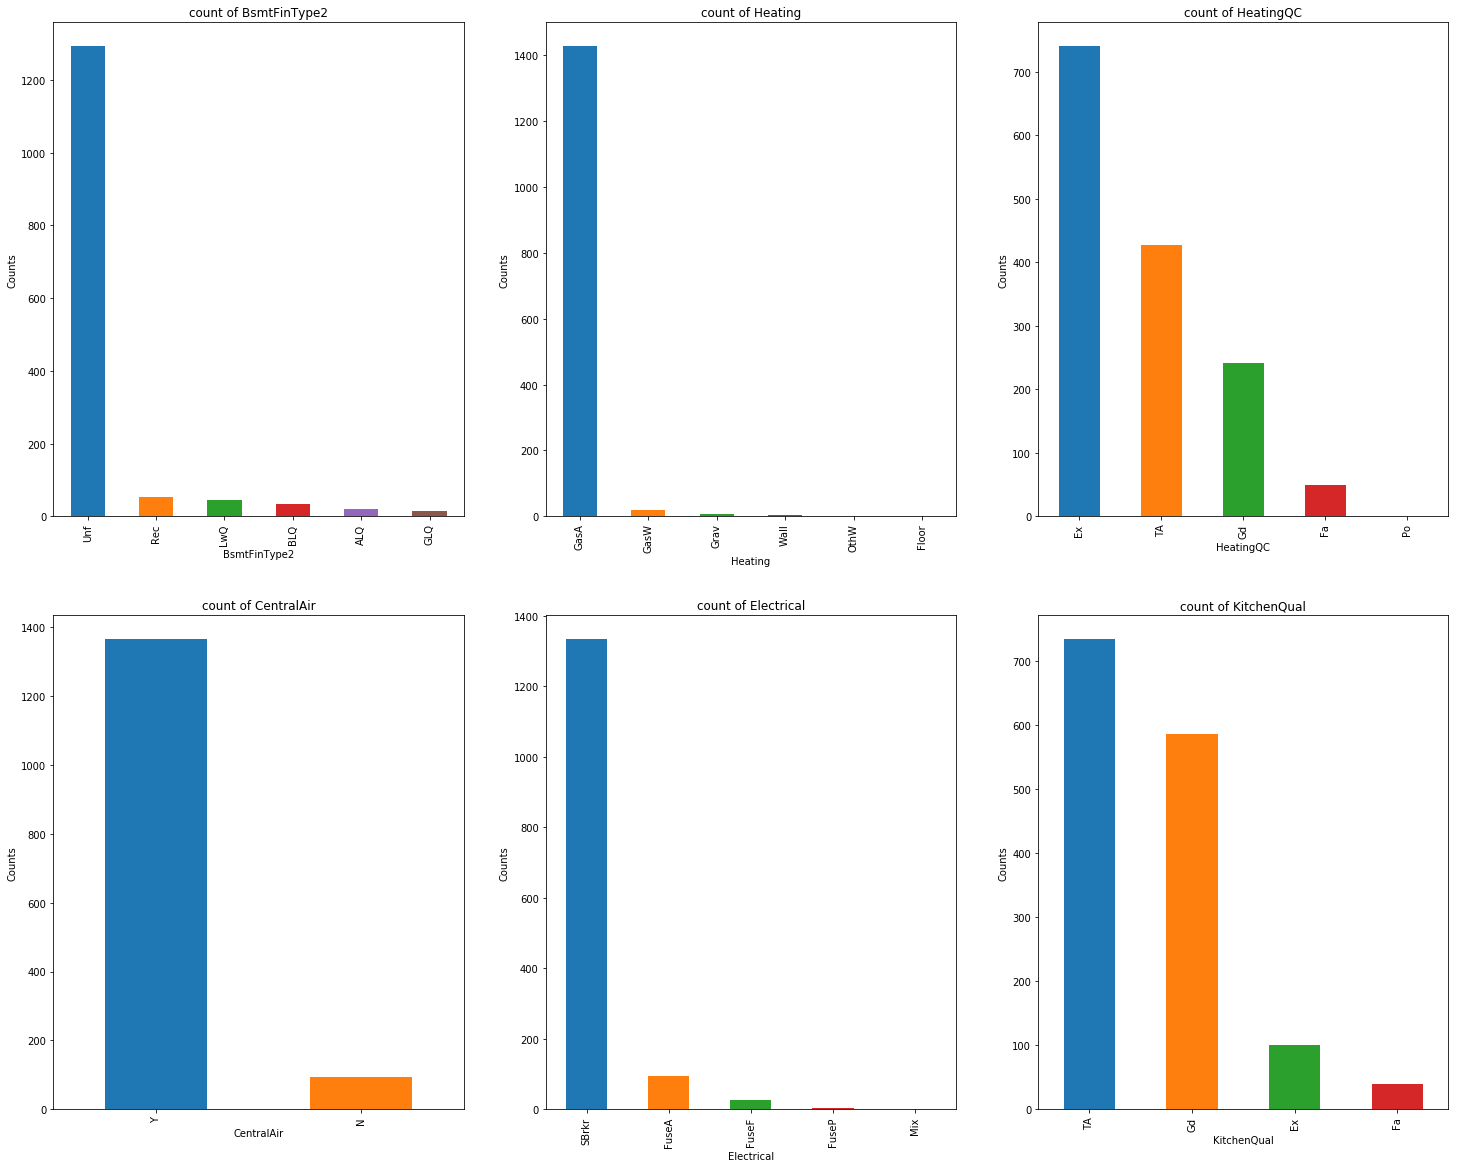

In [201]:
temp_vars = ['BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual']
plt.figure(figsize = (25,20))
for i in range(len(temp_vars)):
    plt.subplot(2,3,i+1)
    non_numeric_vars[temp_vars[i]].value_counts().plot('bar')
    plt.xlabel(temp_vars[i])
    plt.ylabel('Counts')
    plt.title('count of ' + temp_vars[i])
plt.show()  

##### inferences:
- Basements are generally unfinished 
- Heating is Gas forced warm air furnace type
- Heating quality and condition are excellent
- Central air conditioning is present
- Standard Circuit Breakers & Romex electrical system
- Kitchen quality is average

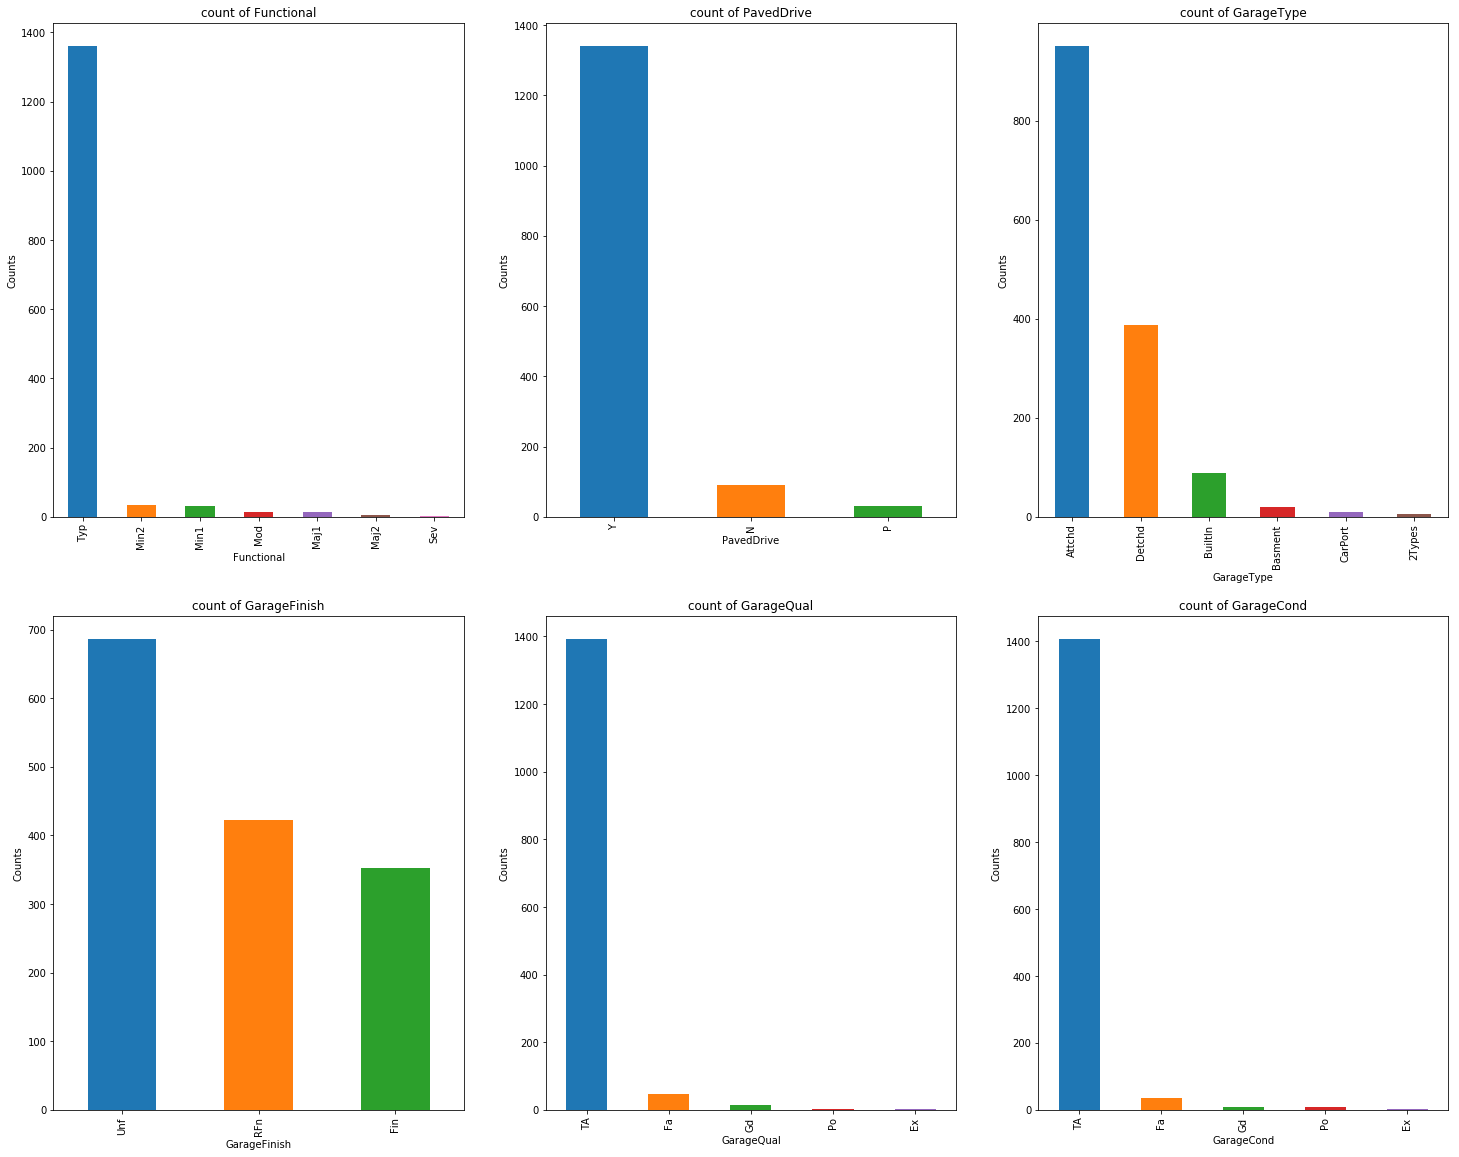

In [202]:
temp_vars = ['Functional','PavedDrive','GarageType','GarageFinish','GarageQual','GarageCond']
plt.figure(figsize = (25,20))
for i in range(len(temp_vars)):
    plt.subplot(2,3,i+1)
    non_numeric_vars[temp_vars[i]].value_counts().plot('bar')
    plt.xlabel(temp_vars[i])
    plt.ylabel('Counts')
    plt.title('count of ' + temp_vars[i])
plt.show()  

##### inferences:
- Paved driveway is present
- Garage has average quality and are attached but unfinished

### Dropping few redundant/unnecessay variables like "Functional" and "GarageQual"

In [203]:
non_numeric_vars = non_numeric_vars.drop(['Functional','GarageQual'], axis = 1)

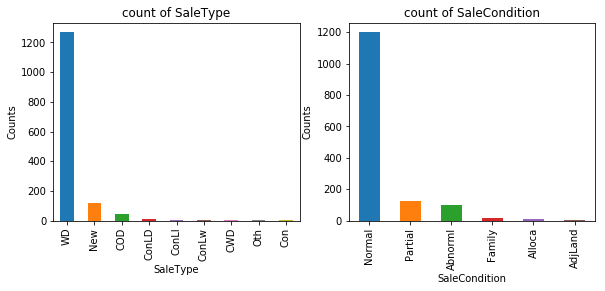

In [204]:
temp_vars = ['SaleType','SaleCondition']
plt.figure(figsize = (15,8))
for i in range(len(temp_vars)):
    plt.subplot(2,3,i+1)
    non_numeric_vars[temp_vars[i]].value_counts().plot('bar')
    plt.xlabel(temp_vars[i])
    plt.ylabel('Counts')
    plt.title('count of ' + temp_vars[i])
plt.show()  

# Step 3: Data Preparation

### Merging numerical and non-numerical columns

In [205]:
housing = numeric_vars.join(non_numeric_vars)

In [206]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,196.0,706,150,856,856,854,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal
1,20,80.0,9600,6,0.0,978,284,1262,1262,0,...,Ex,Y,SBrkr,TA,Attchd,RFn,TA,Y,WD,Normal
2,60,68.0,11250,7,162.0,486,434,920,920,866,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal
3,70,60.0,9550,7,0.0,216,540,756,961,756,...,Gd,Y,SBrkr,Gd,Detchd,Unf,TA,Y,WD,Abnorml
4,60,84.0,14260,8,350.0,655,490,1145,1145,1053,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal


In [207]:
housing.shape

(1460, 55)

In [208]:
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'Age_of_property_in_Years',
       'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Separating housing data set into independent (X) and dependent (y) variables

In [209]:
X = housing.drop('SalePrice',1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,196.0,706,150,856,856,854,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal
1,20,80.0,9600,6,0.0,978,284,1262,1262,0,...,Ex,Y,SBrkr,TA,Attchd,RFn,TA,Y,WD,Normal
2,60,68.0,11250,7,162.0,486,434,920,920,866,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal
3,70,60.0,9550,7,0.0,216,540,756,961,756,...,Gd,Y,SBrkr,Gd,Detchd,Unf,TA,Y,WD,Abnorml
4,60,84.0,14260,8,350.0,655,490,1145,1145,1053,...,Ex,Y,SBrkr,Gd,Attchd,RFn,TA,Y,WD,Normal


In [210]:
y = housing['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Creating dummy variables for categorical data

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
MSSubClass                  1460 non-null int64
LotFrontage                 1460 non-null float64
LotArea                     1460 non-null int64
OverallQual                 1460 non-null int64
MasVnrArea                  1460 non-null float64
BsmtFinSF1                  1460 non-null int64
BsmtUnfSF                   1460 non-null int64
TotalBsmtSF                 1460 non-null int64
1stFlrSF                    1460 non-null int64
2ndFlrSF                    1460 non-null int64
GrLivArea                   1460 non-null int64
FullBath                    1460 non-null int64
HalfBath                    1460 non-null int64
TotRmsAbvGrd                1460 non-null int64
GarageArea                  1460 non-null int64
WoodDeckSF                  1460 non-null int64
OpenPorchSF                 1460 non-null int64
Age_of_property_in_Years    1460 non-null int64
MSZoning                 

### converting categorical variables (MSSubClass, OverallQual, FullBath, HalfBath, TotRmsAbvGrd) to object type for creating dummy variables 

In [212]:
X[['MSSubClass','OverallQual','FullBath','HalfBath','TotRmsAbvGrd']] = X[['MSSubClass','OverallQual','FullBath','HalfBath','TotRmsAbvGrd']].astype(object) 

In [213]:
X_categorical = X[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','GarageType','GarageFinish',
                'GarageCond','PavedDrive','SaleType','SaleCondition','MSSubClass','OverallQual','FullBath','HalfBath',
                 'TotRmsAbvGrd']]

In [214]:
# convert into dummies
housing_dummies = pd.get_dummies(X_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [215]:
# drop categorical variables from X data frame
X = X.drop(X_categorical, axis = 1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,Age_of_property_in_Years
0,65.0,8450,196.0,706,150,856,856,854,1710,548,0,61,5
1,80.0,9600,0.0,978,284,1262,1262,0,1262,460,298,0,31
2,68.0,11250,162.0,486,434,920,920,866,1786,608,0,42,7
3,60.0,9550,0.0,216,540,756,961,756,1717,642,0,35,91
4,84.0,14260,350.0,655,490,1145,1145,1053,2198,836,192,84,8


In [216]:
# concat dummy variables with X data frame
X = pd.concat([X, housing_dummies], axis = 1)

In [217]:
X.shape

(1460, 238)

### Deleting variables from "X" data frame having more than 80% correlation

In [218]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any((upper[column] > 0.80))]
to_drop

['1stFlrSF',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'ExterQual_TA',
 'ExterCond_TA',
 'BsmtQual_TA',
 'KitchenQual_TA',
 'GarageType_Detchd',
 'GarageCond_TA',
 'SaleCondition_Partial',
 'MSSubClass_45',
 'MSSubClass_80',
 'MSSubClass_90',
 'MSSubClass_190',
 'FullBath_2']

In [219]:
X = X.drop(to_drop, 1)

In [220]:
X.shape

(1460, 214)

### Feature Scaling

In [221]:
# scaling the features
from sklearn.preprocessing import scale

# storing the column names of X dataframe in cols
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       ...
       'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7',
       'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10',
       'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_14'],
      dtype='object', length=214)

### Splitting data set into train and test set

In [222]:
# split data set into test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

# Step 4: Model Building and Evaluation

### Ridge and Lasso regression

### Ridge regression or L2 regularization

In [223]:
# importing libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [224]:
# list of alphas to tune
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1,
                  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                  2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                  20, 50, 100, 500, 1000]} 

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [225]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010007,0.002830,0.0004,0.00049,0.0001,{'alpha': 0.0001},-20187.776626,-19867.880918,-22939.593517,-24133.986383,...,-21245.954067,1938.762875,28,-13034.688276,-14067.740215,-13630.396086,-14470.037839,-13647.221084,-13770.016700,480.405965
1,0.008406,0.002061,0.0004,0.00049,0.001,{'alpha': 0.001},-20187.649289,-19867.358878,-22939.555289,-24133.375338,...,-21245.665663,1938.694652,27,-13034.686466,-14067.661981,-13630.397507,-14469.977833,-13647.207915,-13769.986340,480.379926
2,0.010007,0.001098,0.0002,0.00040,0.01,{'alpha': 0.01},-20186.377106,-19862.144388,-22939.172862,-24127.271280,...,-21242.784576,1938.014407,26,-13034.713143,-14066.880508,-13630.411666,-14469.378446,-13647.076405,-13769.692034,480.106165
3,0.008006,0.001096,0.0006,0.00049,0.05,{'alpha': 0.05},-20180.749252,-19839.098199,-22937.476747,-24102.042021,...,-21230.396795,1935.556219,25,-13034.973464,-14063.429370,-13630.473636,-14466.957015,-13646.495939,-13768.465885,478.920239
4,0.011209,0.001834,0.0004,0.00049,0.1,{'alpha': 0.1},-20173.774188,-19810.878196,-22935.364724,-24071.262247,...,-21215.208346,1932.665324,24,-13035.296134,-14059.508224,-13630.565368,-14464.008285,-13645.860643,-13767.047731,477.506293


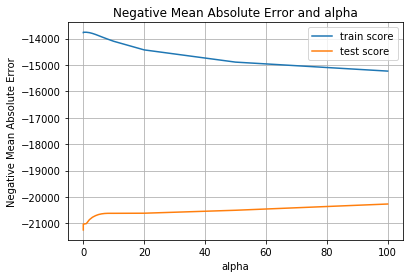

In [226]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid()
plt.show()

### Finding optimum value of alpha for Ridge regression

#### choosing alpha = 20 as the optimum value, this is the place where train and test error are not much 
#### after alpha = 20, the "Negative Mean Absolute Error" is increasing gradually

In [227]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.33553137e+03,  5.31518557e+03,  3.30440215e+03,  3.73904968e+03,
       -2.47650147e+03,  5.81476725e+03,  6.84519282e+03,  2.23419885e+04,
        5.09739160e+03,  5.67983120e+02,  2.11546866e+03, -7.23207331e+03,
        2.12912530e+03, -3.90483595e+00,  2.28874789e+03,  1.20640965e+03,
        3.42083551e+02, -1.00833926e+03, -3.35710591e+01,  8.09003566e+02,
        1.03959011e+02,  2.74936877e+03, -6.27430282e+02,  2.10426565e+03,
       -1.83853125e+03, -9.24524122e+02, -7.90886101e+02,  1.35619498e+03,
       -8.07378988e+02,  6.64510907e+01, -6.81316616e+02, -2.56976649e+02,
       -4.48593067e+02, -2.27352950e+03,  4.32663924e+03, -4.77989921e+03,
       -7.04146875e+02, -1.48508127e+03, -3.51177747e+03, -3.35582616e+03,
       -4.40099178e+03,  8.02805789e+02, -1.63069921e+03,  4.55283089e+03,
        4.80059381e+03, -2.67649611e+03, -3.68888383e+02, -2.41981092e+03,
       -1.13244714e+02,  2.64305446e+03, -5.59586910e+02,  1.15082132e+03,
       -1.50346255e+03,  

In [228]:
# model with optimal alpha
# Ridge regression
from sklearn import metrics
lm = Ridge(alpha=20)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9220215210903048
0.8276104632713882


In [229]:
# ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180336.888),
 ('LotFrontage', -1335.531),
 ('LotArea', 5315.186),
 ('MasVnrArea', 3304.402),
 ('BsmtFinSF1', 3739.05),
 ('BsmtUnfSF', -2476.501),
 ('TotalBsmtSF', 5814.767),
 ('2ndFlrSF', 6845.193),
 ('GrLivArea', 22341.989),
 ('GarageArea', 5097.392),
 ('WoodDeckSF', 567.983),
 ('OpenPorchSF', 2115.469),
 ('Age_of_property_in_Years', -7232.073),
 ('MSZoning_FV', 2129.125),
 ('MSZoning_RH', -3.905),
 ('MSZoning_RL', 2288.748),
 ('Street_Pave', 1206.41),
 ('LotShape_IR2', 342.084),
 ('LotShape_IR3', -1008.339),
 ('LotShape_Reg', -33.571),
 ('LandContour_HLS', 809.004),
 ('LandContour_Low', 103.959),
 ('LandContour_Lvl', 2749.369),
 ('Utilities_NoSeWa', -627.43),
 ('LotConfig_CulDSac', 2104.266),
 ('LotConfig_FR2', -1838.531),
 ('LotConfig_FR3', -924.524),
 ('LotConfig_Inside', -790.886),
 ('LandSlope_Mod', 1356.195),
 ('LandSlope_Sev', -807.379),
 ('Neighborhood_Blueste', 66.451),
 ('Neighborhood_BrDale', -681.317),
 ('Neighborhood_BrkSide', -256.977),
 ('Neighborhood_Clea

In [248]:
lis = list(zip(cols, model_parameters))

In [249]:
dic = dict(lis)

In [250]:
print(sorted(dic.items(), key = lambda x : x[1]))

[('Condition2_PosN', -17032.076), ('Age_of_property_in_Years', -8914.617), ('MSSubClass_160', -3746.124), ('BsmtFinType2_Unf', -2838.422), ('HeatingQC_TA', -2834.721), ('Neighborhood_MeadowV', -2778.58), ('Neighborhood_Edwards', -2664.604), ('BldgType_Duplex', -2655.85), ('BsmtUnfSF', -2588.553), ('Neighborhood_NAmes', -2554.015), ('Neighborhood_Mitchel', -2323.553), ('MSSubClass_120', -2314.033), ('BsmtExposure_No', -2031.373), ('BsmtFinType1_Rec', -1999.869), ('BsmtFinType2_BLQ', -1994.977), ('BsmtQual_Gd', -1971.333), ('OverallQual_4', -1952.478), ('BldgType_2fmCon', -1836.891), ('HouseStyle_2.5Fin', -1826.13), ('OverallQual_5', -1790.758), ('Exterior2nd_Wd Shng', -1717.712), ('BsmtFinType2_LwQ', -1677.439), ('Exterior2nd_Stone', -1677.4), ('Condition1_RRAe', -1630.14), ('Condition2_RRAe', -1617.036), ('BsmtFinType1_LwQ', -1552.39), ('GarageFinish_Unf', -1507.978), ('Exterior2nd_BrkFace', -1462.147), ('BsmtFinType2_Rec', -1406.284), ('Exterior2nd_Stucco', -1405.988), ('LotConfig_FR2

### Lasso Regression or L1 regularization

In [230]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   20.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [231]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.222959,0.023430,0.000800,0.000400,0.0001,{'alpha': 0.0001},-20231.684063,-19867.937350,-23270.441974,-23891.056714,...,-21272.586462,1928.244194,24,-13034.688567,-14067.748808,-13630.396030,-14470.044341,-13647.222578,-13770.020065,480.408763
1,0.203648,0.006733,0.000200,0.000399,0.001,{'alpha': 0.001},-20231.663480,-19867.924187,-23270.151771,-23891.463519,...,-21272.598679,1928.302854,25,-13034.689376,-14067.748042,-13630.396955,-14470.042494,-13647.222917,-13770.019957,480.407811
2,0.216154,0.023324,0.000801,0.000749,0.01,{'alpha': 0.01},-20231.457644,-19867.792549,-23267.249744,-23895.531572,...,-21272.720429,1928.891241,26,-13034.697474,-14067.740390,-13630.406203,-14470.024028,-13647.226209,-13770.018861,480.398296
3,0.207348,0.014889,0.000200,0.000400,0.05,{'alpha': 0.05},-20230.542820,-19867.207493,-23254.349543,-23913.611809,...,-21273.261112,1931.534899,27,-13034.733464,-14067.706381,-13630.446230,-14469.941956,-13647.240850,-13770.013776,480.356071
4,0.206439,0.008036,0.000601,0.000490,0.1,{'alpha': 0.1},-20229.402949,-19866.499368,-23238.019113,-23936.211284,...,-21273.901113,1934.860324,28,-13034.776921,-14067.662977,-13630.494240,-14469.838204,-13647.259161,-13770.006300,480.303426


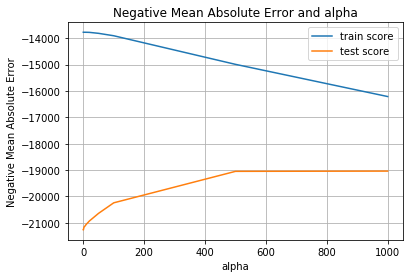

In [232]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid()
plt.show()

### Finding optimum value of alpha for Lasso Regresion

#### choosing alpha = 500 as here the "Negative Mean Absolute Error" is minimum for the test train and also error is not increasing much for the train set 

In [233]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [234]:
lasso.coef_

array([-0.00000000e+00,  3.84611298e+03,  2.52336372e+03,  4.33780041e+03,
       -0.00000000e+00,  2.54504245e+03,  0.00000000e+00,  2.63770665e+04,
        5.17711159e+03,  3.92380687e+02,  1.38747346e+03, -7.10647542e+03,
        1.80051615e+03,  0.00000000e+00,  1.43795737e+03,  7.10105085e+01,
        7.71814273e+00, -1.02831117e+03, -6.73247400e+01,  0.00000000e+00,
        0.00000000e+00,  1.13712255e+03, -2.56209188e+02,  2.36644158e+03,
       -7.48265049e+02, -1.92333219e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  7.72851173e+02,
        6.17966502e+02, -0.00000000e+00,  5.55568759e+03, -2.71026949e+03,
        0.00000000e+00, -2.06487581e+02, -1.93497521e+03, -1.09417187e+03,
       -8.10835171e+02,  2.80187467e+02, -0.00000000e+00,  5.03362380e+03,
        5.05521836e+03, -5.53972424e+02,  0.00000000e+00, -3.23599090e+02,
        0.00000000e+00,  2.42796794e+03,  0.00000000e+00,  1.14536231e+03,
       -1.30688311e+03,  

In [235]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.931963300598706
0.8187735807157955


In [236]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180338.304),
 ('LotFrontage', 453.113),
 ('LotArea', 5243.372),
 ('MasVnrArea', 3053.97),
 ('BsmtFinSF1', 6582.477),
 ('BsmtUnfSF', -2588.553),
 ('TotalBsmtSF', 8044.272),
 ('2ndFlrSF', 2990.427),
 ('GrLivArea', 28156.106),
 ('GarageArea', 4716.067),
 ('WoodDeckSF', 432.68),
 ('OpenPorchSF', 2051.501),
 ('Age_of_property_in_Years', -8914.617),
 ('MSZoning_FV', 2505.822),
 ('MSZoning_RH', 389.863),
 ('MSZoning_RL', 2550.833),
 ('Street_Pave', 933.752),
 ('LotShape_IR2', 213.032),
 ('LotShape_IR3', 48.001),
 ('LotShape_Reg', -160.697),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -309.739),
 ('LandContour_Lvl', 1441.818),
 ('Utilities_NoSeWa', -338.183),
 ('LotConfig_CulDSac', 1978.579),
 ('LotConfig_FR2', -1382.829),
 ('LotConfig_FR3', -560.833),
 ('LotConfig_Inside', -351.907),
 ('LandSlope_Mod', 652.696),
 ('LandSlope_Sev', -1071.439),
 ('Neighborhood_Blueste', 278.839),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 1026.665),
 ('Neighborhood_ClearCr', -74.

In [237]:
lis = list(zip(cols, model_parameters))

In [242]:
dic = dict(lis)

In [247]:
print(sorted(dic.items(), key = lambda x : x[1]))

[('Condition2_PosN', -17032.076), ('Age_of_property_in_Years', -8914.617), ('MSSubClass_160', -3746.124), ('BsmtFinType2_Unf', -2838.422), ('HeatingQC_TA', -2834.721), ('Neighborhood_MeadowV', -2778.58), ('Neighborhood_Edwards', -2664.604), ('BldgType_Duplex', -2655.85), ('BsmtUnfSF', -2588.553), ('Neighborhood_NAmes', -2554.015), ('Neighborhood_Mitchel', -2323.553), ('MSSubClass_120', -2314.033), ('BsmtExposure_No', -2031.373), ('BsmtFinType1_Rec', -1999.869), ('BsmtFinType2_BLQ', -1994.977), ('BsmtQual_Gd', -1971.333), ('OverallQual_4', -1952.478), ('BldgType_2fmCon', -1836.891), ('HouseStyle_2.5Fin', -1826.13), ('OverallQual_5', -1790.758), ('Exterior2nd_Wd Shng', -1717.712), ('BsmtFinType2_LwQ', -1677.439), ('Exterior2nd_Stone', -1677.4), ('Condition1_RRAe', -1630.14), ('Condition2_RRAe', -1617.036), ('BsmtFinType1_LwQ', -1552.39), ('GarageFinish_Unf', -1507.978), ('Exterior2nd_BrkFace', -1462.147), ('BsmtFinType2_Rec', -1406.284), ('Exterior2nd_Stucco', -1405.988), ('LotConfig_FR2

# Step 5: Question-Answer

### Question 1: Which variables are significant in predicting the price of a house?

### According to Lasso regression:

#### some of the top variables help in predicting the price of the houses are:
1. Condition2
2. Age_of_property_in_Years 
3. MSSubClass
4. BsmtFinType2
5. HeatingQC
6. RoofMatl
7. GrLivArea
8. OverallQual
9. SaleType
10. TotalBsmtSF 

### According to Ridge regression:

#### some of the top variables help in predicting the price of the houses are:
1. Condition2
2. Age_of_property_in_Years 
3. MSSubClass
4. BsmtFinType2
5. HeatingQC
6. RoofMatl
7. GrLivArea
8. OverallQual
9. SaleType
10. TotalBsmtSF 

### Question 2: How well those variables describe the price of a house?

#### The coefficients involved for the variables are :
- Condition2_PosN&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;        = -17032.076 
- Age_of_property_in_Years&emsp;&emsp; = -8914.617
- MSSubClass_160&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;           = -3746.124
- BsmtFinType2_Unf&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;         = -2838.422
- HeatingQC_TA&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;             = -2834.721
- RoofMatl_CompShg&emsp;&emsp;&emsp;&emsp;&emsp;         = 78180.62
- GrLivArea&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;          = 28156.106 
- OverallQual_9&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;            = 13730.175 
- SaleType_New&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;             = 8708.97 
- TotalBsmtSF&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;              = 8044.272 

### Question 3: Determine the optimal value of lambda for ridge and lasso regression

#### For Ridge regression the optimal value of lambda is 20
#### For Lasso regression the optimal value of lambda is 500